#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html

#**01: Install All the Required Packages**


- GitHub: https://github.com/facebookresearch/llama



In [1]:
!nvidia-smi

Thu Feb 22 10:10:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.1/816.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.8 MB/s eta 0:00:00


#**02: Logged in with a Hugging Face account**

In a lot of cases, you must be logged in with a Hugging Face account to interact with the Hub: download private repos, upload files, create PRs,…

In [4]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

#**03: Import All the Required Libraries**

In [5]:
from langchain.llms import HuggingFacePipeline

AutoTokenizer. A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model.

In [7]:
import transformers

In [8]:
from transformers import AutoTokenizer

In [9]:
import torch
import warnings
warnings.filterwarnings('ignore')

##**04: Load the Llama 2 Model**

we are using Llama 2 Chat Model with 7 Billion Parameters

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

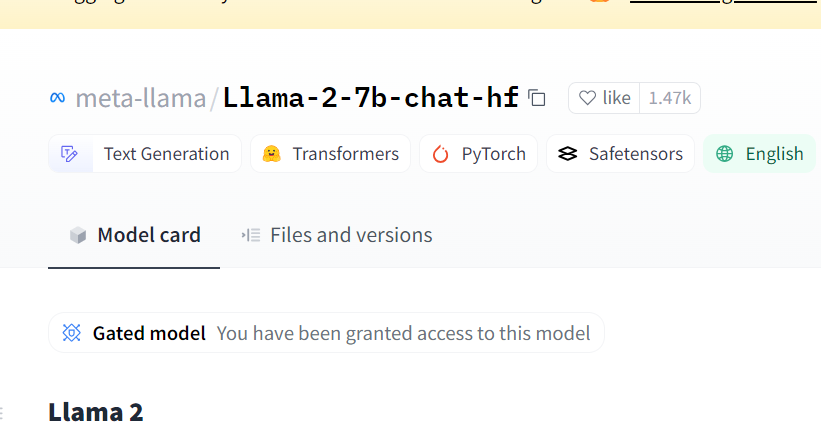

In [13]:
# model="meta-llama/Llama-2-7b-chat-hf" # if we have access to model
model="daryl149/llama-2-7b-chat-hf" # if we donot have


In [14]:
tokenizer=AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

In [15]:
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )

config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [16]:
llm=HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature':0})

In [17]:
prompt="What would be a good name for a company that makes colorful socks"

In [18]:
print(llm(prompt))

?

A) Hue & Cry
B) Sole Mates
C) Footloose & Fancy Free
D) Socks of Fun


In [19]:
prompt="I want to open a restaurant for  indian food. Suggest me a fence name for this"

In [20]:
print(llm(prompt))

 purpose?
Answer: Sure, here are some unique and catchy name suggestions for your Indian restaurant:
1. Tandoor Express - Tandoor is a traditional Indian clay oven used for cooking, and Express suggests speed and efficiency, making it a great name for a quick and delicious meal.
2. Spice Route - This name captures the essence of Indian cuisine, which is known for its bold flavors and diverse spices. It also suggests a journey of flavors and culinary discoveries.
3. Mama's Kitchen - This name evokes a sense of warmth, comfort, and home-cooked food, which is exactly what Indian cuisine is all about. It also adds a personal touch, making it feel more like a family-owned restaurant.
4. Curry Cottage - Curry is one of the most well-known Indian dishes, and Cottage suggests a cozy and welcoming atmosphere. It also has a quaint and charming feel to it.
5. The Naan House - Naan is a popular Indian flatbread, and House suggests a cozy and inviting space. It also has a nice ring to it and is eas

##**05: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#**Import All the Required Libraries**

In [21]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

#**Example 1**

In [23]:
prompt_template1=PromptTemplate(input_variables=["cuisine"],
                               template="I want to open a restaurant for {cuisine} food. Suggest a fency name for this")

In [24]:
input_prompt=prompt_template1.format(cuisine="indian")

In [25]:
print(input_prompt)

I want to open a restaurant for indian food. Suggest a fency name for this


#**Example 2**

In [26]:
prompt_template2=PromptTemplate(input_variables=["book_name"],
                               template="Provide me a concise summary of the book {book_name}")

In [27]:
input_prompt=prompt_template2.format(book_name="Alchemist")

In [28]:
print(input_prompt)

Provide me a concise summary of the book Alchemist


In [29]:
chain = LLMChain(llm=llm, prompt=prompt_template2, verbose=True)
response= chain.run("Harry Potter")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Provide me a concise summary of the book Harry Potter

> Finished chain.
 and the Philosopher’s Stone by J.K. Rowling.  Please provide a detailed answer, including the plot summary and any notable themes, symbols, or motifs.  I need this answer in 200-300 words.  Thank you.
In the first book of J.K. Rowling’s Harry Potter series, Harry Potter and the Philosopher’s Stone, readers learn about a young orphan named Harry Potter and his incredible journey at Hogwarts School of Witchcraft and Wizardry.  After Harry discovers that he is a wizard, he learns about the magical world, makes new friends, and uncovers the truth about his parents’ death.  Along the way, Rowling explores themes of friendship, love, and the battle between good and evil.
One notable symbol in the book is the stone, which represents knowledge and power.  The Philosopher’s Stone, the central plot of the book, is a powerful magical object that can grant eternal l